In [166]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as sts

# Leitura do CSV

In [4]:
df = pd.read_csv('tempo.csv', sep=';')

In [98]:
df.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85.0,85.0,FALSO,nao
1,sol,80.0,90.0,VERDADEIRO,nao
2,nublado,83.0,86.0,FALSO,sim
3,chuva,70.0,NaN,FALSO,sim
4,chuva,68.0,80.0,FALSO,sim


In [164]:
df.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        0
Vento          0
Jogar          0
dtype: int64

# Olhando Atributos Categóricos

In [19]:
# Olhando atributos categoricos
df.groupby('Aparencia').size()
df['Aparencia'] = df['Aparencia'].replace({'menos': 'sol'})
df.groupby('Aparencia').size()


Aparencia
chuva      5
nublado    3
sol        6
dtype: int64

In [47]:
df.groupby('Vento').size()

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

In [20]:
df.groupby('Jogar').size()

Jogar
nao    5
sim    9
dtype: int64

# Olhando Atributos Númericos

In [72]:
# Temperatura
df['Temperatura'].describe()

count    14.000000
mean     73.678571
std       6.556286
min      64.000000
25%      69.250000
50%      72.750000
75%      78.750000
max      85.000000
Name: Temperatura, dtype: float64

## Análise Gráfica (Temperatura)

Text(0.5, 1.0, 'Box Plot Enviesado')

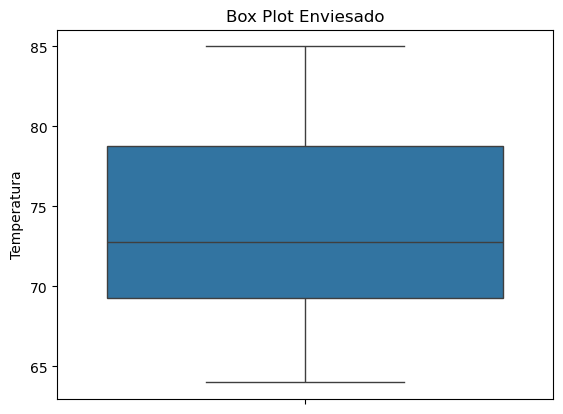

In [75]:
sns.boxplot(df['Temperatura']).set_title('Box Plot Enviesado')

<Axes: xlabel='Temperatura', ylabel='Count'>

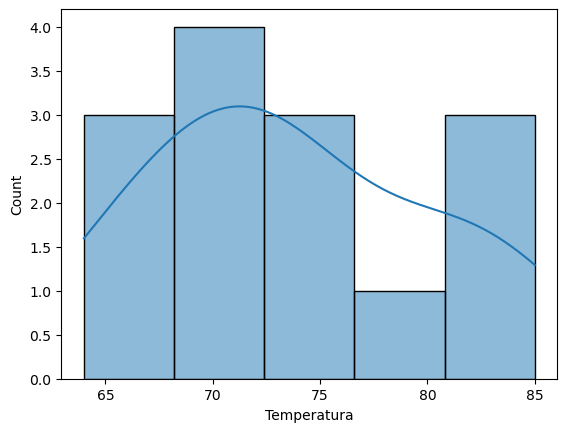

In [76]:
sns.histplot(df['Temperatura'], kde=True)

In [73]:
# Ajustando enviesamento
df.loc[df['Temperatura'] == 1220, 'Temperatura'] = 73.5

In [106]:
df['Temperatura'].describe()
# Observamos que fizemos o tratamento efetivo desse enviesamento

count    14.000000
mean     73.678571
std       6.556286
min      64.000000
25%      69.250000
50%      72.750000
75%      78.750000
max      85.000000
Name: Temperatura, dtype: float64

In [87]:
# Umidade
df['Umidade'].describe()

count     13.000000
mean      89.769231
std       34.540203
min       65.000000
25%       70.000000
50%       85.000000
75%       90.000000
max      200.000000
Name: Umidade, dtype: float64

In [107]:
# Preenchimento de NaN's
media = df['Umidade'].mean()
df.fillna(media, inplace=True)

## Análise Gráfica (Umidade)

<Axes: ylabel='Umidade'>

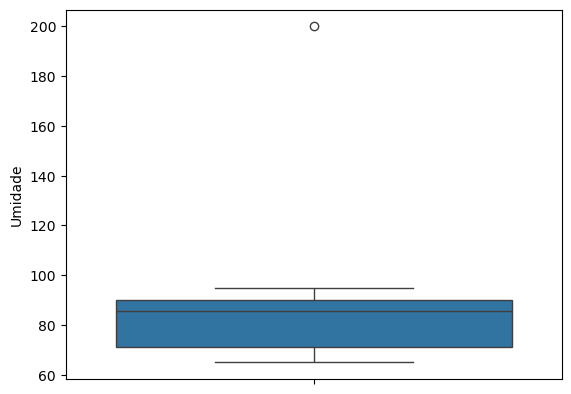

In [118]:
sns.boxplot(df['Umidade'])

In [121]:
df.loc[df['Umidade'] == 200, ] = 89.76

<Axes: ylabel='Umidade'>

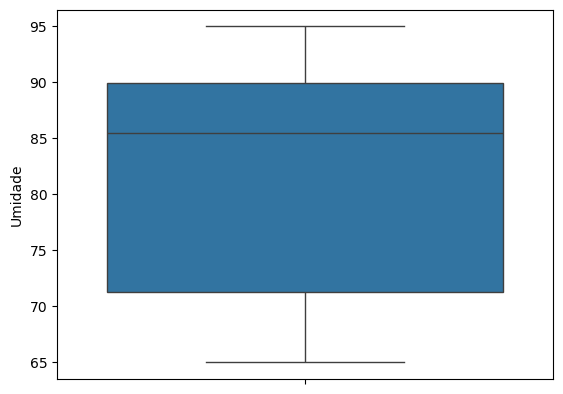

In [122]:
sns.boxplot(df['Umidade'])

<Axes: xlabel='Umidade', ylabel='Count'>

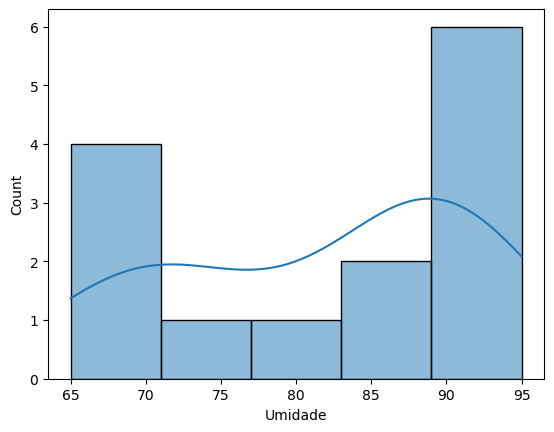

In [123]:
sns.histplot(df['Umidade'], kde=True)

Podemos observar que o gráfico acima possui uma assimetria negativa não é interessante eu tratar um outlier com a média

In [129]:
moda = df['Umidade'].mode()
moda

0    70.0
Name: Umidade, dtype: float64

In [160]:
df.loc[df['Umidade'] == 89.77, 'Umidade'] = 70